In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt
%matplotlib inline

### Learning Rate Exploration

In [25]:
fp = r'./results/lr_explore.p'
df = pkl.load(open(fp, 'rb'))
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
1,,,,,50.90,4.44,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
2,,,,,60.46,4.4,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
3,,,,,74.80,4.38,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
4,,,,,87.40,4.58,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01
5,,,,,84.18,4.39,20000,False,0.530094,0.534054,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,False,2,0.01


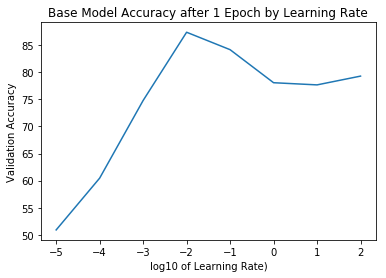

In [27]:
plt.plot(np.log10(df['LR']), df['final_val_acc'])
plt.title("Base Model Accuracy after 1 Epoch by Learning Rate")
plt.xlabel("log10 of Learning Rate)")
plt.ylabel("Validation Accuracy")
plt.savefig(r'writeup/img/lr_explore.png')
plt.show()

### Tokenization Explore

In [28]:
fp = r'./results/vocab_explore.p'
df = pkl.load(open(fp, 'rb'))
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
1,,,,,86.72,14.92,36384,True,0.244464,0.249718,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
2,,87.4,,,87.54,22.32,44096,True,0.170917,0.180050,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
3,,87.58,,,87.54,27.01,44096,True,0.134779,0.146825,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
4,,86.74,,,86.94,36.56,44096,True,0.112453,0.127482,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
5,,87.04,,,87.78,42.76,44096,True,0.096929,0.114567,...,100,naive,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_val_acc,64.0,88.352500,0.885384,85.960000,87.715000,88.460000,89.020000,89.740000
total_data_iterated,64.0,50436.000000,9357.960434,36384.000000,44096.000000,48192.000000,53312.000000,88192.000000
pct_unk_train,64.0,0.484272,0.257272,0.010923,0.345287,0.583013,0.689611,0.801887
pct_unk_val,64.0,0.494599,0.253548,0.033413,0.361999,0.596571,0.698909,0.803563
LR,64.0,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000
NEPOCH,64.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
BATCH_SIZE,64.0,32.000000,0.000000,32.000000,32.000000,32.000000,32.000000,32.000000
NGRAM_SIZE,64.0,2.500000,1.126872,1.000000,1.750000,2.500000,3.250000,4.000000
VOC_SIZE,64.0,45000.000000,23094.010768,10000.000000,27500.000000,45000.000000,62500.000000,80000.000000
EMBEDDING_DIM,64.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000


max acc = 89.74


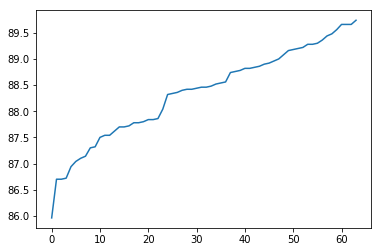

In [30]:
plt.plot(df['final_val_acc'].sort_values().values)
print("max acc = %s" % df['final_val_acc'].max())
plt.show()

### for each tokenization scheme, how does vocabulary size affect performance

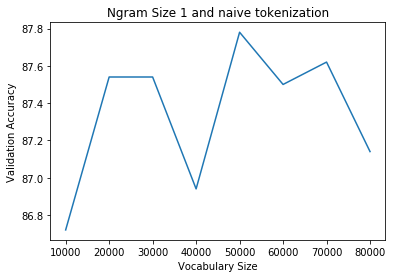

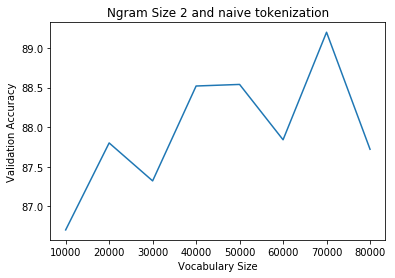

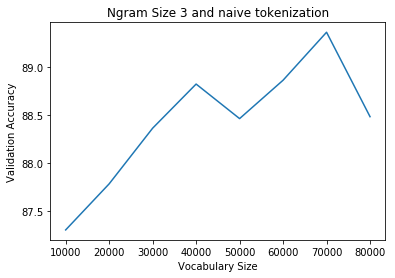

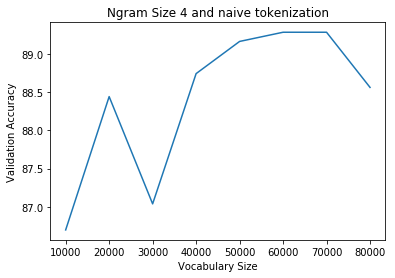

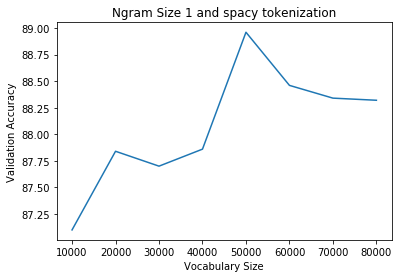

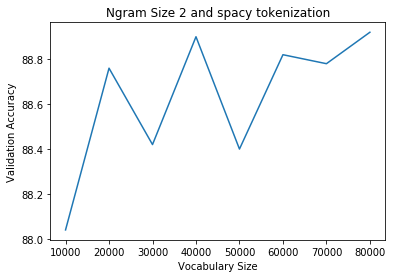

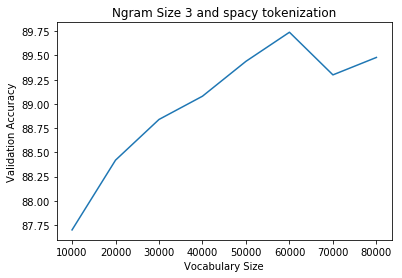

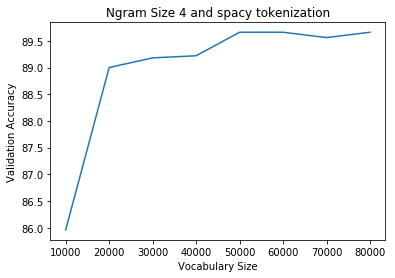

In [48]:
ng_sizes = np.sort(df['NGRAM_SIZE'].unique())
ng_modes = ('naive', 'spacy')

for ng_mode in ng_modes:
    for ng_size in ng_sizes:
        sub_df = df[(df['NGRAM_SIZE'] == ng_size) & (df['NGRAM_MODE'] == ng_mode)]
        plt.plot(sub_df['VOC_SIZE'], sub_df['final_val_acc'])
        plt.title("Ngram Size %s and %s tokenization" % (ng_size, ng_mode))
        plt.ylabel("Validation Accuracy")
        plt.xlabel("Vocabulary Size")
        plt.show()

### extra investigation for ngram size 4 and spacy

In [57]:
fp = r'./results/voc_additional.p'
df = pkl.load(open(fp, 'rb'))
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
1,,90.32,89.96,,89.72,147.78,68192,True,0.678686,0.690848,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
2,,89.36,89.54,,89.40,146.82,64096,True,0.674262,0.687713,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
3,,89.26,,,89.40,122.35,52288,True,0.670891,0.685635,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
4,,89.62,89.64,,89.56,155.49,64096,True,0.667521,0.683472,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
5,,89.70,,,89.86,130.85,48192,True,0.664150,0.681276,...,100,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01


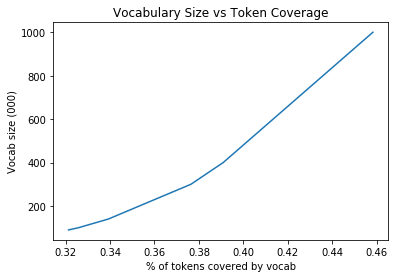

In [66]:
plt.plot(1-df['pct_unk_train'], df['VOC_SIZE'] / 1000)
plt.title("Vocabulary Size vs Token Coverage")
plt.xlabel("% of tokens covered by vocab")
plt.ylabel("Vocab size (000)")
plt.show()

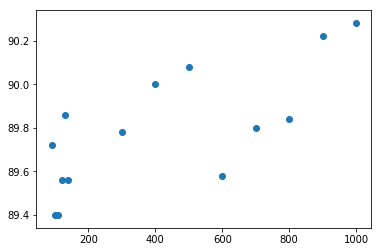

In [68]:
plt.scatter(df['VOC_SIZE']/1000, df['final_val_acc'])
#plt.title("Vocabulary Size vs Token Coverage")
#plt.xlabel("% of tokens covered by vocab")
#plt.ylabel("Vocab size (000)")
plt.show()

In [54]:
df_res = df.set_index(['NGRAM_SIZE', 'NGRAM_MODE']).sort_index()

(1, 'naive')


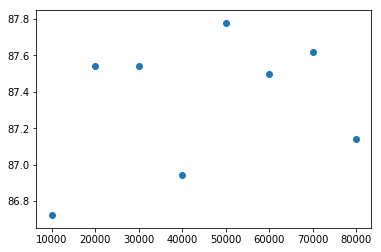

(1, 'spacy')


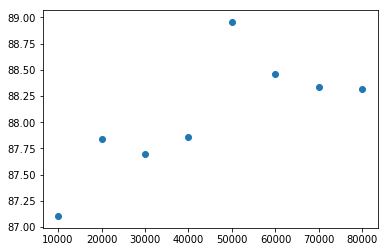

(2, 'naive')


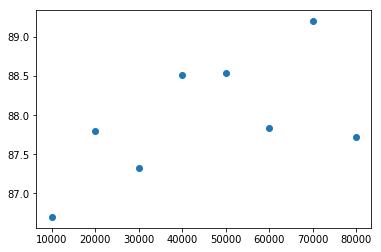

(2, 'spacy')


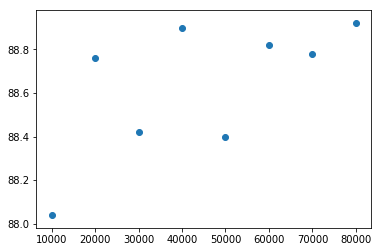

(3, 'naive')


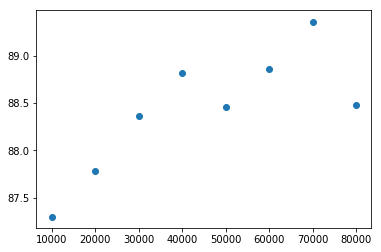

(3, 'spacy')


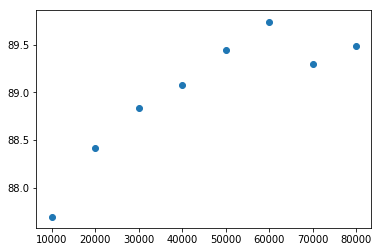

(4, 'naive')


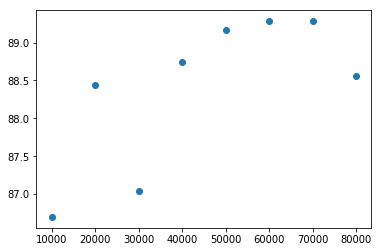

(4, 'spacy')


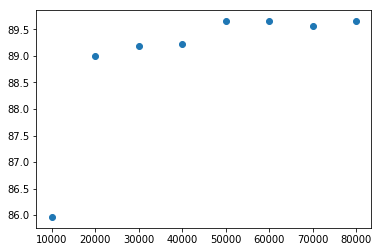

""


In [65]:
def graph_fn(df):
    print(df.index.values[0])
    plt.scatter(df['VOC_SIZE'],df['final_val_acc'])
    plt.show()
df_res.groupby(df_res.index).apply(graph_fn)

### Embedding size optimization

In [66]:
fp = r'./results/embdim.p'
df = pkl.load(open(fp, 'rb')).reset_index(drop=True)
df.head()

,initial_val_acc,epoch1_val_acc,epoch2_val_acc,epoch3_val_acc,final_val_acc,training_time,total_data_iterated,early_stopped,pct_unk_train,pct_unk_val,...,EMBEDDING_DIM,NGRAM_MODE,VAL_SIZE,OPTIMIZER,VAL_FREQ,REMOVE_STOP_WORDS,REMOVE_PUNC,EARLY_STOP,EARLY_STOP_LOOKBACK,EARLY_STOP_MIN_IMPROVE
0,,88.18,,,88.60,20.51,44096,True,0.476073,0.482561,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
1,,89.02,,,88.98,24.38,48192,True,0.447026,0.455849,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
2,,89.08,,,89.24,30.41,48192,True,0.426857,0.438027,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
3,,89.14,89,,89.00,42.43,64096,True,0.411370,0.424864,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01
4,,86.82,,,89.30,42.68,48192,True,0.398803,0.414668,...,50,spacy,5000,<class 'torch.optim.adam.Adam'>,4,True,True,True,4,0.01


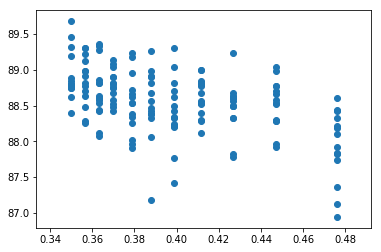

In [69]:
# do pct unk tokens affect the final accuracy?
plt.scatter(df['pct_unk_train'], df['final_val_acc'])
plt.show()

In [70]:
df.columns

Index(['initial_val_acc', 'epoch1_val_acc', 'epoch2_val_acc', 'epoch3_val_acc',
       'final_val_acc', 'training_time', 'total_data_iterated',
       'early_stopped', 'pct_unk_train', 'pct_unk_val', 'LR', 'NEPOCH',
       'BATCH_SIZE', 'NGRAM_SIZE', 'VOC_SIZE', 'EMBEDDING_DIM', 'NGRAM_MODE',
       'VAL_SIZE', 'OPTIMIZER', 'VAL_FREQ', 'REMOVE_STOP_WORDS', 'REMOVE_PUNC',
       'EARLY_STOP', 'EARLY_STOP_LOOKBACK', 'EARLY_STOP_MIN_IMPROVE'],
      dtype='object')

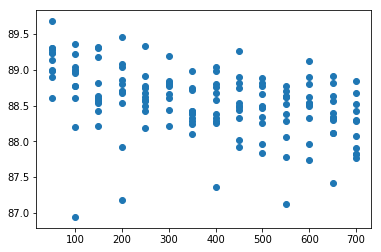

In [71]:
# strangly, the embedding dimension looks like it negatively affects the final acc
plt.scatter(df['EMBEDDING_DIM'], df['final_val_acc'])
plt.show()

In [ ]:
optims = {}